### A Jupyter notebook guiding through Data Exploration, Model Training, and Evaluation Process of Loan Prediction problem for Marketing Campaign of a bank.

### Structure of the notebook:
    -1. Basic Data Statistics
    -2. Data Exploration
        -2.1 Univariate Analysis
            -2.1.1 Categorical Variables
            -2.1.2 Numeric Variables
        -2.2 Analysis with more than two variables and Bivariate Analysis
            -2.2.1 Heatmap
            -2.2.2 Analysis of categorical variables with respect to target variable Personal Loan
            -2.2.3 Analysis of Numeric variables with respect to target variable Personal Loan
            -2.2.4 Analysis of other pairs of variables
            -2.2.5 Missing Value Check
    -3. Data Pre-processing
        -3.1 Drop unnecessary variables
        -3.2 Derive new variables
        -3.3 Encoding of the ordinal variables
        -3.4 Missing and wrong value treatment
        -3.5 Baseline model
        -3.6 Skewness Treatment
        -3.7 Resampling
        -3.8 Scaling
        -3.9 Train Test Split
    -4. Modelling
        -4.1 Logistic Regression
        -4.2 Decision Tree
        -4.3 Random Forest
        -4.4 Gradient Boosting
        -4.5 Model by getting only important variables
        -4.6 Logistic Regression model with Imp Variables
        -4.7 Decision Tree model with Imp Variables
        -4.8 Random Forest model with Imp Variables
        -4.9 Gradient Boosting model with Imp Variables
        -4.10 Support Vector Machine model with Imp Variables
        -4.11 Naive Bayes model with Imp Variables
        -4.12 Voting Model with best 3 models earlier
    -5. Final Thoughts & Summary 

In [1]:
# Import required Python libraries for the analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import scipy
import category_encoders as ce
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from utils_Loan_Prediction import plot_count_percentage_missing, visualize_numeric_variables, visualize_correlations, scatter_plot, evaluate_model_performance

In [2]:
# Set the few options to view the output
pd.set_option('display.max_rows', 5000)

## 1. Basic Data Statistics

In [8]:
# Read the given input data from the Data sheet
loan_data = pd.read_excel("Loan_Prediction_dataset.xlsx", sheet_name="Data")

In [9]:
# View the sample of the input data
loan_data.head()

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan
0,1,25,1,49.0,91107,4.0,1.6,Undergrad,0,1,0,NO,NO
1,2,45,19,34.0,90089,3.0,1.5,Undergrad,0,1,0,NO,NO
2,3,39,15,11.0,94720,1.0,1.0,Undergrad,0,0,0,NO,NO
3,4,35,9,NaN,94112,1.0,2.7,Graduate,0,0,0,NO,NO
4,5,35,8,45.0,91330,4.0,1.0,Graduate,0,0,0,NO,NO


In [10]:
# View the number of rows and columns present in the data
loan_data.shape

(5000, 13)

In [11]:
# View basic properties of the data like data type, count, non-null rows and total columns in the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              4980 non-null   float64
 4   Postal Code         5000 non-null   int64  
 5   Family Size         4991 non-null   float64
 6   CCAvgSpending       5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Investment Account  5000 non-null   int64  
 10  Deposit Account     5000 non-null   int64  
 11  InternetBanking     5000 non-null   object 
 12  Personal Loan       5000 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


### Observations: 
1. Except Income and Family Size, all the columns seem to have all the rows.

In [12]:
# View the basic statistics of the data
loan_data.describe()

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Mortgage,Investment Account,Deposit Account
count,5000.000000,5000.000000,5000.000000,4980.000000,5000.000000,4991.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,45.338400,20.104600,73.840361,93152.503000,2.396714,1.937938,56.498800,0.104400,0.06040
std,1443.520003,11.463166,11.467954,46.079300,2121.852197,1.148189,1.747659,101.713802,0.305809,0.23825
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000,0.000000,0.00000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000,0.000000,0.00000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000,0.000000,0.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000,1.000000,1.00000


### Observations: 
1. Experience column has minimum value as -3 which is strange. By right, it should be greater than or equal to zero.

## 2. Data Exploration

### 2.1 Univariate Analysis

### 2.1.1 Categorical Variables

#### 2.1.1.1 ID

In [13]:
# View different values present in the ID column and its count
loan_data.ID.value_counts(dropna=False)

1       1
3331    1
3338    1
3337    1
3336    1
3335    1
3334    1
3333    1
3332    1
3330    1
3340    1
3329    1
3328    1
3327    1
3326    1
3325    1
3324    1
3323    1
3339    1
3341    1
3438    1
3351    1
3358    1
3357    1
3356    1
3355    1
3354    1
3353    1
3352    1
3350    1
3342    1
3349    1
3348    1
3347    1
3346    1
3345    1
3344    1
3343    1
3322    1
3321    1
3320    1
3292    1
3299    1
3298    1
3297    1
3296    1
3295    1
3294    1
3293    1
3291    1
3319    1
3290    1
3289    1
3288    1
3287    1
3286    1
3285    1
3284    1
3300    1
3301    1
3302    1
3303    1
3318    1
3317    1
3316    1
3315    1
3314    1
3313    1
3312    1
3311    1
3310    1
3309    1
3308    1
3307    1
3306    1
3305    1
3304    1
3359    1
3360    1
3361    1
3410    1
3417    1
3416    1
3415    1
3414    1
3413    1
3412    1
3411    1
3409    1
3400    1
3408    1
3407    1
3406    1
3405    1
3404    1
3403    1
3402    1
3418    1
3419    1
3420    1


### Observations: 
1. There are 5000 unique IDs in the dataset. As it is having different unique value for each of the row, there is no way we can use this to categorize into categories of target variable. We may need to drop this column later.

##### 2.1.1.2 Postal Code

In [14]:
# View the value and its counts of column "Postal Code"
loan_data['Postal Code'].value_counts(dropna=False)

94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
91711     52
94025     52
92093     51
90024     50
90245     50
90089     46
91330     46
92121     45
94304     45
94143     37
95051     34
94608     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94542     27
94550     27
94301     27
95064     26
94501     26
95039     26
95819     26
93407     26
94105     25
91107     25
94022     25
95060     25
94303     25
93117     24
94596     24
93555     23
94080     23
95521     23
91380     22
92612     22
92717     22
92647     21
94110     21
91768     21
94117     20
94132     20
90034     20
90401     20
94005     19
90266     19
92122     19
92697     19
90025     19
95747     19
90840     18
94709     18
94309     18
92130     18
90291     18
93940     18
94122     18
93023     17
90630     17
92009     17
94583     17
92691     17
90740     17
92407     17
91311     17
92120     17
92096     17

In [15]:
# Get first 2 numbers into another column called "Postal Code Series". 
# Here, assumption is first 2 numbers will give you the neighbourhood that person is living.
# It is possible that Neighbourhood may have some say in deciding whether person accepts personal loan offered.
loan_data['Postal Code Series'] = loan_data['Postal Code']//1000

In [16]:
# View the value and counts of created column "Postal Code Series"
loan_data['Postal Code Series'].value_counts()

94    1472
92     988
95     815
90     703
91     565
93     416
96      40
9        1
Name: Postal Code Series, dtype: int64

### Observations: 
1. To use this feature, using the Postal code won't help. With Postal Code, there are too many categories. Instead, neighbourhood based on first few numbers of Postal Code could be helpful.

##### 2.1.1.3 Family Size

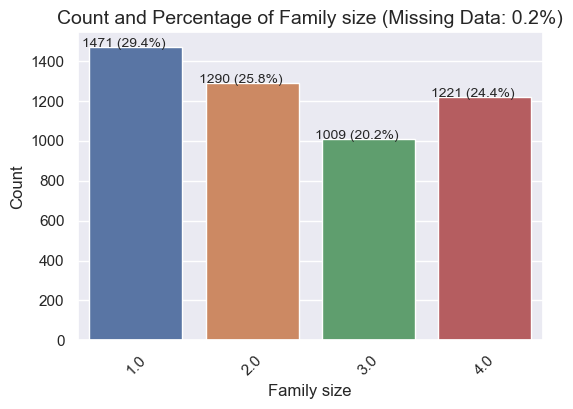

In [17]:
plot_count_percentage_missing(loan_data,'Family Size')

### Observations: 
1. Family Size with 1 member are the highest and it decreases for 2 and 3. Interestingly, % increases for family size 4. There is no one dominant category of Family Size. They seem to be in more or less similar range. Missing value of percentage seems to be very small also.

##### 2.1.1.4 Education

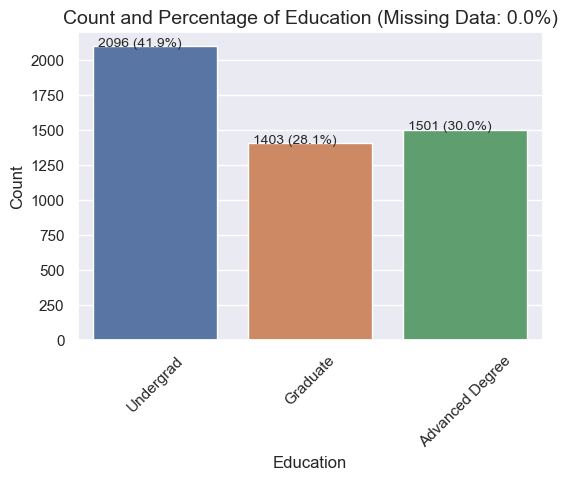

In [18]:
plot_count_percentage_missing(loan_data,'Education')

### Observations: 
1. Undergrad customers are the highest. Advanced degree customers are higher than Graduate ones.

##### 2.1.1.5 Investment Account

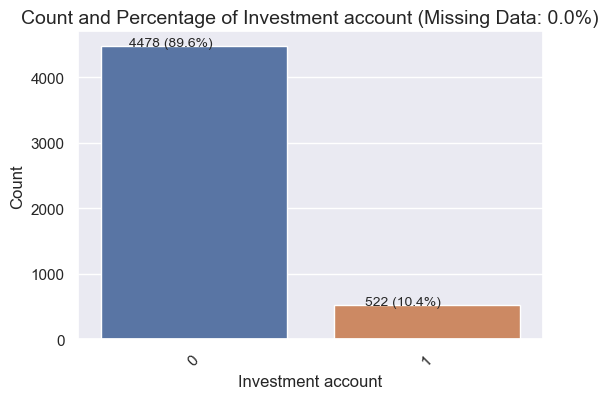

In [19]:
plot_count_percentage_missing(loan_data,'Investment Account')

### Observations: 
1. Most of the customers don't have any Investment account and only small amount have it.

##### 2.1.1.6 Deposit Account

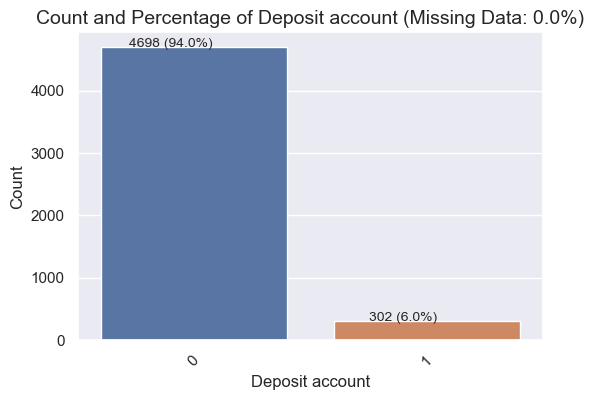

In [20]:
plot_count_percentage_missing(loan_data,'Deposit Account')

### Observations: 
1. Many customers don't even have deposit account in the bank and very less amount of people have it.

##### 2.1.1.7 Internet Banking

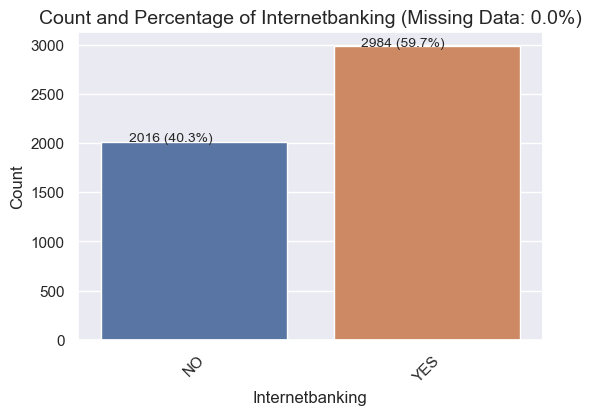

In [21]:
plot_count_percentage_missing(loan_data,'InternetBanking')

### Observations: 
1. Unlike previous three variables, people with internet banking are greater than the ones with no access. Also, it is not highly skewed in favour of any one category.

##### 2.1.1.8 Personal Loan

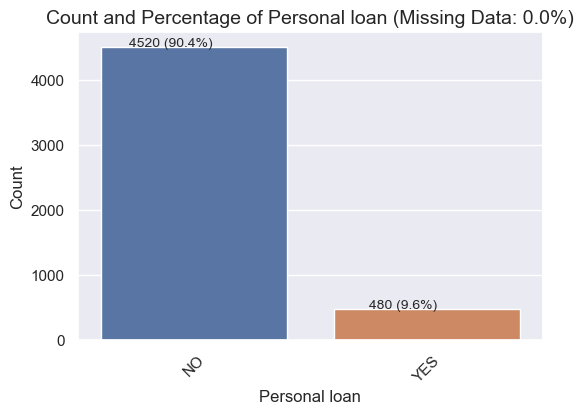

In [22]:
plot_count_percentage_missing(loan_data,'Personal Loan')

### Observations: 
1. There are more customers who have rejected the loan offered. This column has very imbalanced proportions of two categories.

### 2.1.2 Numeric Variables

##### 2.1.2.1 Age

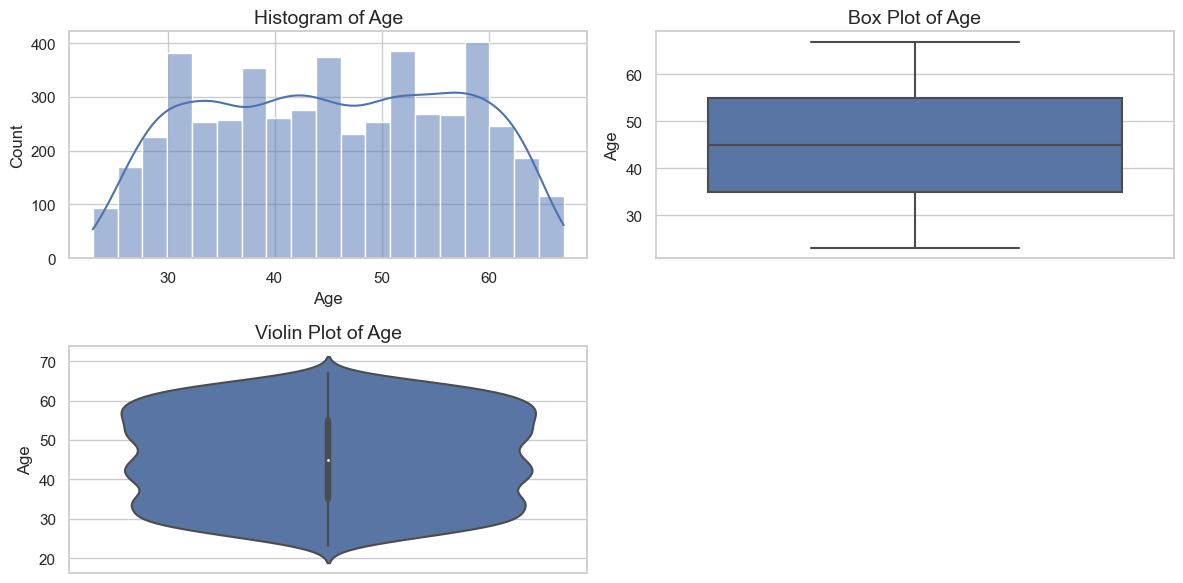

In [23]:
visualize_numeric_variables(loan_data, ['Age'])

### Observations: 
1. There is no pattern as such which is visible. Middle aged people seem to be higher than the younger or older people.

##### 2.1.2.2 Experience

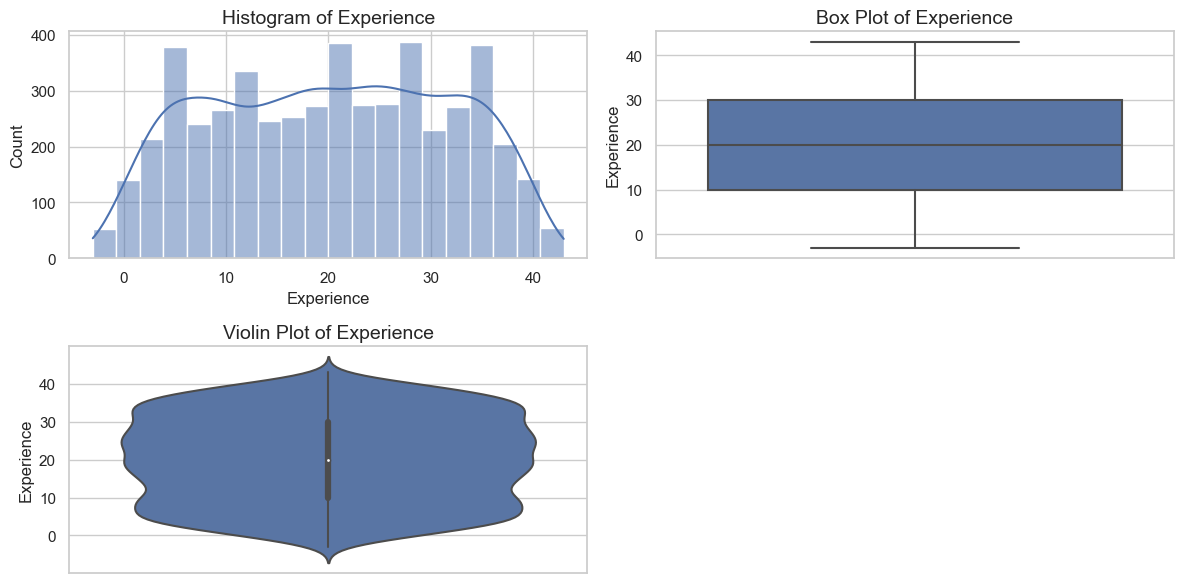

In [24]:
visualize_numeric_variables(loan_data, ['Experience'])

In [25]:
# Total number of entries with negative experience
len(loan_data[loan_data['Experience']<0])

52

### Observations: 
1. There are few instances where there is negative experience which is not possible. Looking at the data, it seems like negative sign may have been put by mistake. They account to around 1% of the entire data which is very small. But we can treat them later.

##### 2.1.2.3 Income

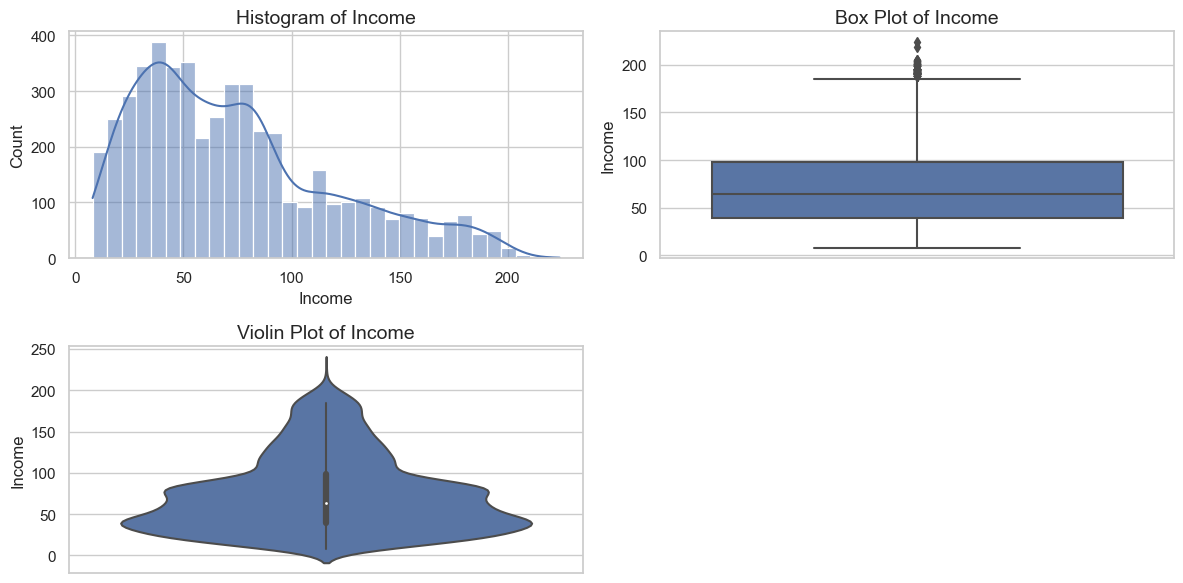

In [26]:
visualize_numeric_variables(loan_data, ['Income'])

### Observations: 
1. Distribution seems to be skewed positively. There are small number of people with higher income which is logical. There are few outliers as well.

##### 2.1.2.4 CCAvgSpending

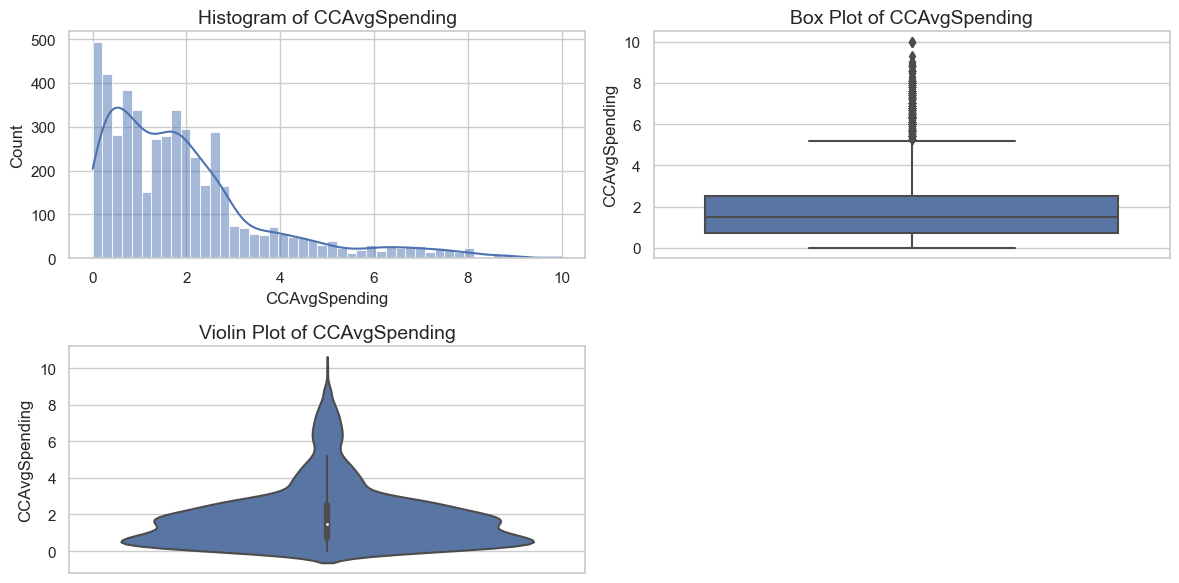

In [27]:
visualize_numeric_variables(loan_data, ['CCAvgSpending'])

### Observations: 
1. Distribution seems to be similar to Income. Credit Card Avg spending gets less as the amount gets higher. By logic, if person has higher income, then he/she can spend higher. There are few outliers as well which needs to be studied later.

##### 2.1.2.5 Mortgage

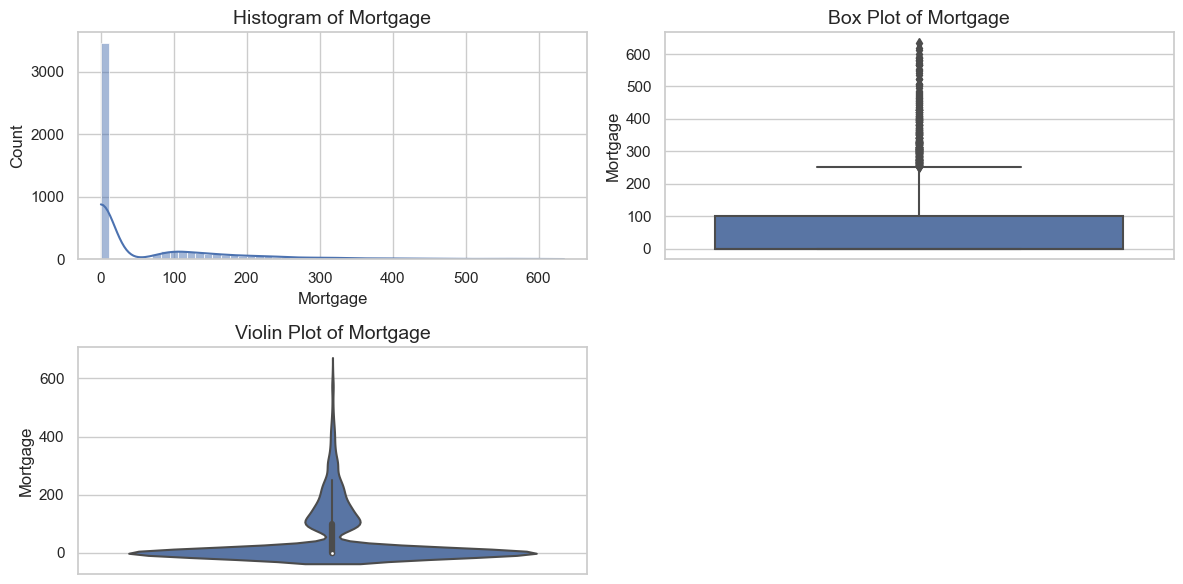

In [28]:
visualize_numeric_variables(loan_data, ['Mortgage'])

### Observations: 
1. There are large number of people with no mortgage. As the mortgage amount gets higher, percentage seems to be reducing.

### 2.2 Analysis with more than two variables and bivariate analysis

#### 2.2.1 Heatmap

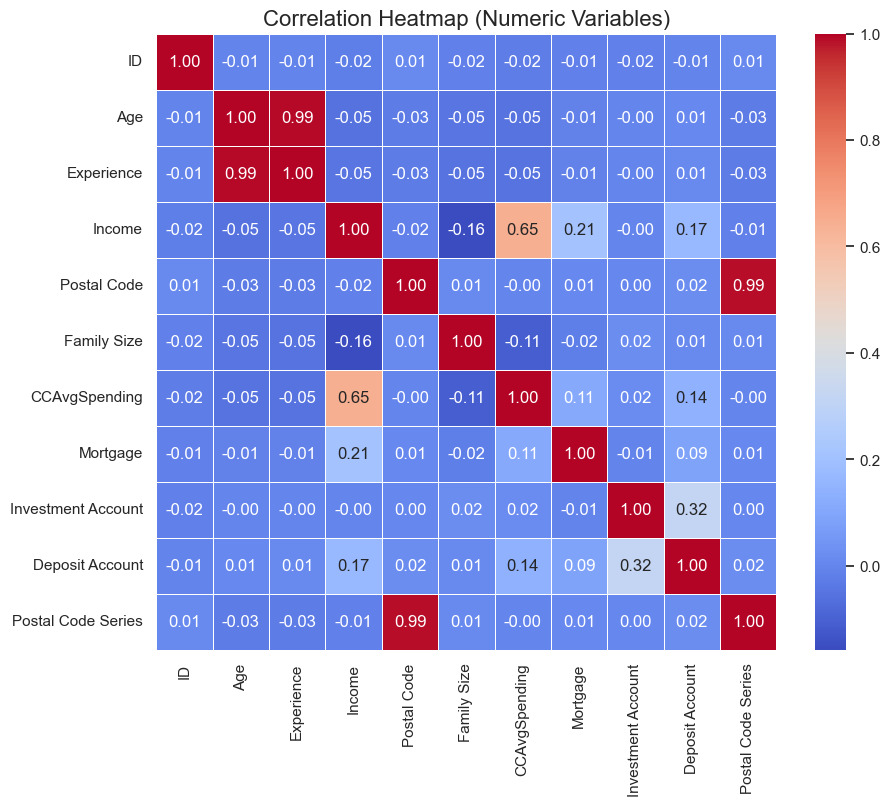

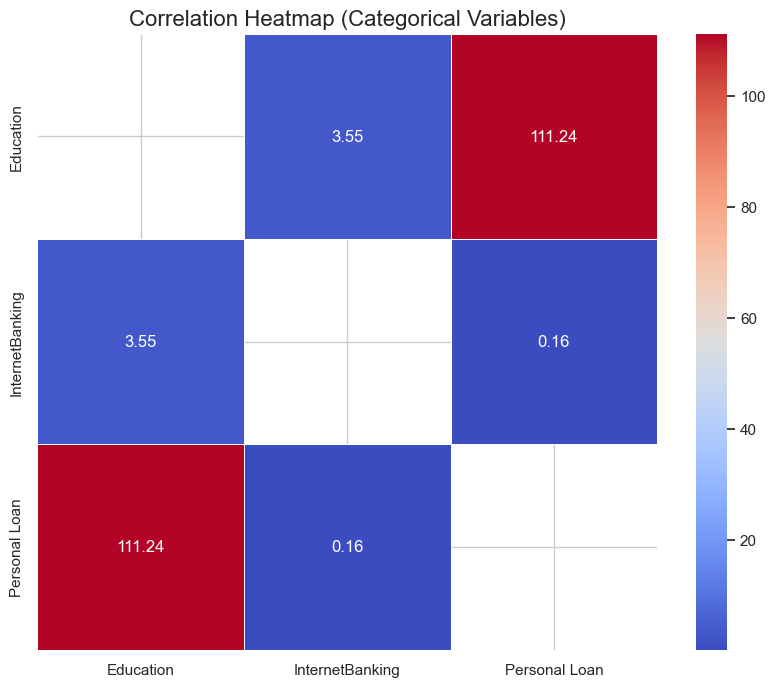

In [29]:
visualize_correlations(loan_data)

### Observations: 
1. Age and Experience seem to be highly correlated. Income and CCAvgSpending have some correlation as well. If more than one variables are giving same information, then one of them could be removed for the modelling.
2. Education seem to have a higher correlation with Personal Loan.

#### 2.2.2 Analysis of categorical variables with respect to Target Variable Personal Loan

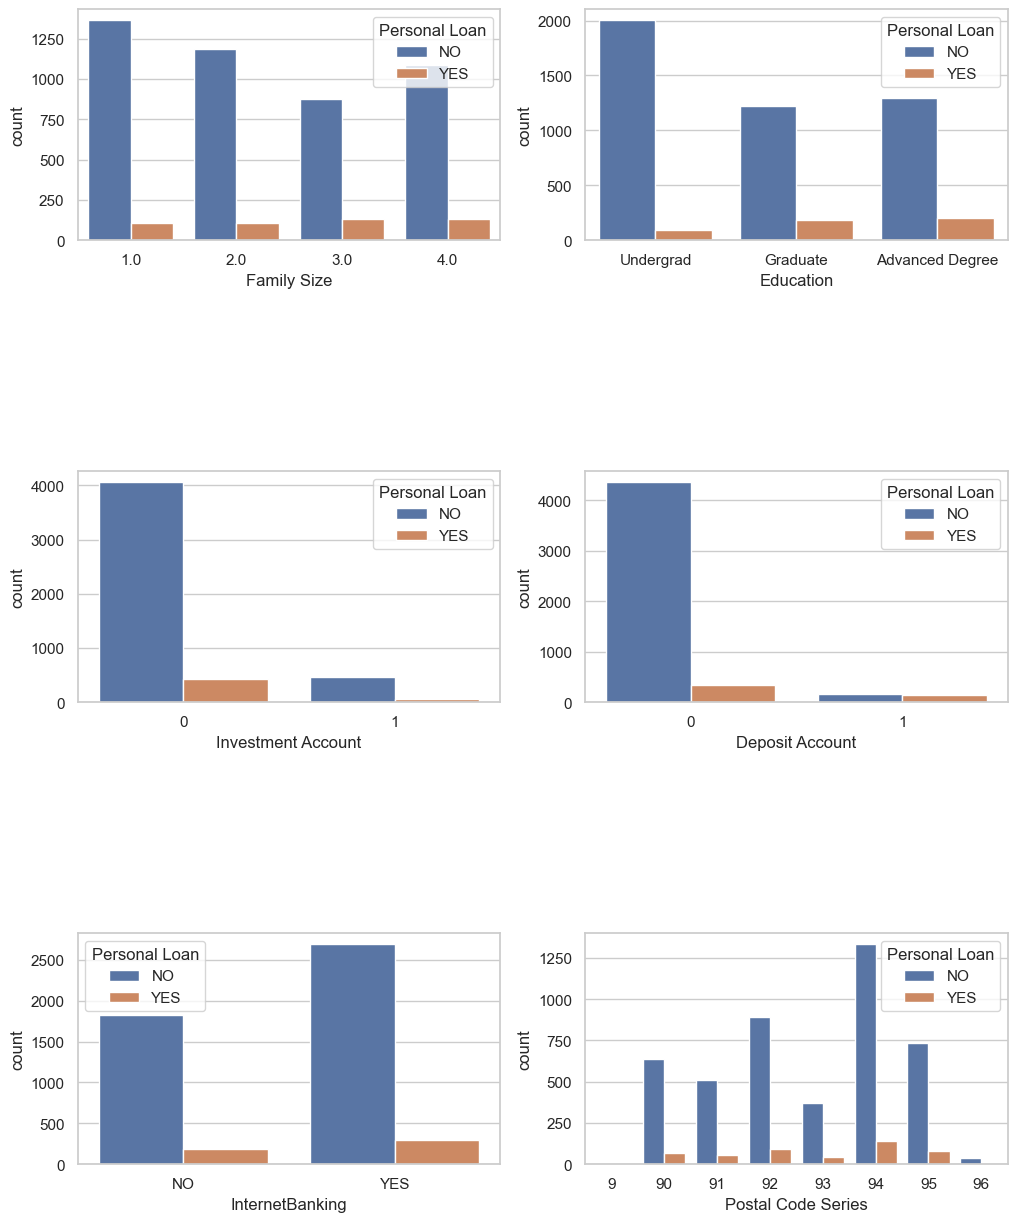

In [30]:
# Visualize the impact of each of the other categorical variables on Personal Loan through count plot
categorical_columns = ['Family Size', 'Education', 'Investment Account', 'Deposit Account', 'InternetBanking', 'Postal Code Series']
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_data,hue='Personal Loan',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

### Observations:
1. Customers with Big Family Size seem to take personal loan compared to small family size but only slightly.
2. As the Education level increases from Undergrad to Advanced Degree, count of people taking the personal loan increases.
3. Customers with no Investment Account or Deposit Account seem to take Personal Loans.
4. Customers with Internet Banking access have higher tendency to accept the personal loan offer.
5. Customers with Postal Code starting with 92, 94, 95 are more likely to accept personal loan offers.

##### 2.2.3 Analysis of Numeric variables with respect to Target variable Personal Loan

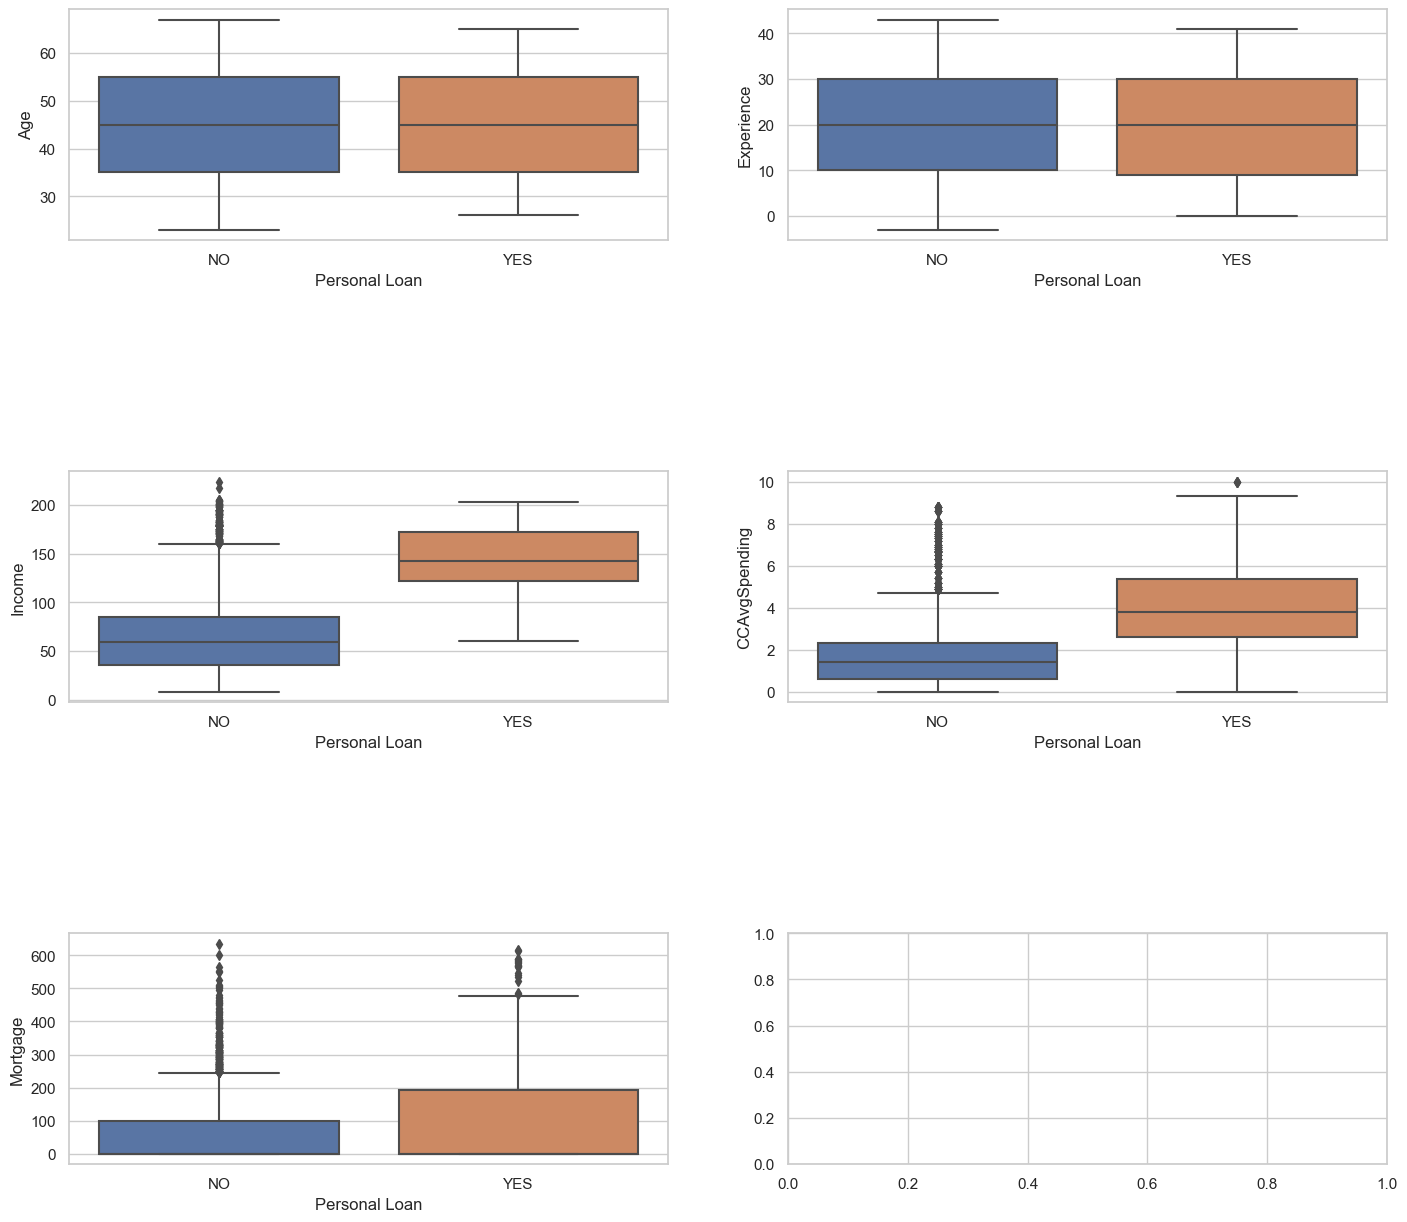

In [31]:
# Visualize the different numeric variables through box plot
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvgSpending', 'Mortgage']
fig,axes = plt.subplots(3,2,figsize=(17,15))
for idx,num_col in enumerate(numerical_columns):
    row,col = idx//2,idx%2
    sns.boxplot(y=num_col,data=loan_data,x='Personal Loan',ax=axes[row,col])
    
plt.subplots_adjust(hspace=1)

### Observations: 
1. Spread of Age and Experience is similar and can not differentiate target variable based on a single variable.
2. With Income and CCAvgSpending, we can clearly distinguish the two categories of the target variables. Income and CCAvgSpending is higher for people accepting the loan.
3. Range of Mortgage is definitely different for two categories. If there is mortgage, he/she may have higher tendency for personal loan.

#### 2.2.4 Analysis of other pairs of variables

##### 2.2.4.1 Age vs Experience

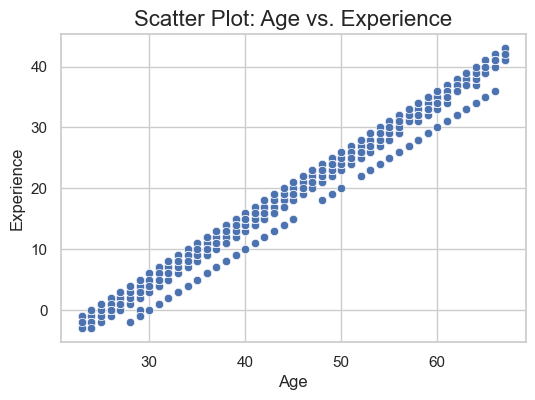

In [32]:
scatter_plot(loan_data, 'Age', 'Experience')

### Observations: 
1. Age and Experience seem to be linealy proportional to each other.

##### 2.2.4.2 Age vs Income

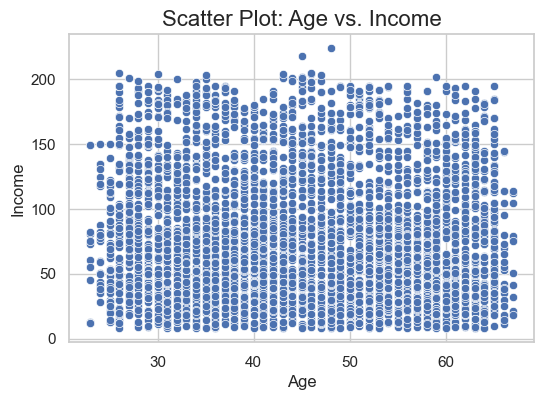

In [33]:
scatter_plot(loan_data, 'Age', 'Income')

### Observations: 
1. There is no specific pattern from Age income pair for the customers

##### 2.2.4.3 Income vs CCAvgSpending

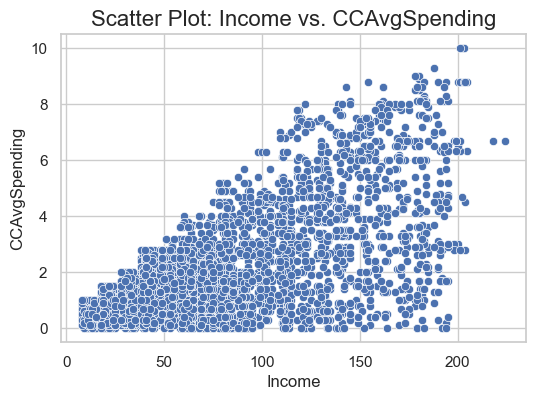

In [34]:
scatter_plot(loan_data, 'Income', 'CCAvgSpending')

### Observations: 
1. As the income goes higher, CCAvgSpending is mostly on the higher side.

#### 2.2.5 Missing values check

In [35]:
# Check the missing values count in the data
loan_data.isnull().sum()

ID                     0
Age                    0
Experience             0
Income                20
Postal Code            0
Family Size            9
CCAvgSpending          0
Education              0
Mortgage               0
Investment Account     0
Deposit Account        0
InternetBanking        0
Personal Loan          0
Postal Code Series     0
dtype: int64

In [36]:
# Total count of the instances which either have missing data or wrong data
len(loan_data[(loan_data['Experience']<0) | (loan_data['Family Size'].isnull()) | (loan_data['Income'].isnull())])

80

### Observations: 
1. Missing values count is very small. 
2. There are around 1.5% of the data which is either missing or wrong. We can either ignore these rows or we can treat them.

## 3. Data Pre-processing

### 3.1 Drop unnecessary variables

In [37]:
# Removing the ID column as it is not important
loan_data = loan_data.drop(['ID'], axis = 1)

### 3.2 Derive new variables

In [38]:
# Calulate the average income of the neighbourhood of the customer. It is possible that if person is living in posh neighbourhood, he may have different impact than the one in poor neighbourhood.
mean_income = loan_data[['Income','Postal Code Series']].groupby(['Postal Code Series']).mean().round(2)

In [39]:
# Getting the avg neighbourhood from Postal Code Series which is eventually derived from Postal Code
loan_data['avg_nbrhd_inc']=0
loan_data['avg_nbrhd_inc'] = [mean_income['Income'][x] for x in loan_data['Postal Code Series']]

In [40]:
# Removing these variables of Postal Code and Postal Code Series as we have already got avg neighbourhood from Postal Code
loan_data = loan_data.drop(['Postal Code'], axis = 1)

In [41]:
# Sample of the data
loan_data.head(2)

,Age,Experience,Income,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan,Postal Code Series,avg_nbrhd_inc
0,25,1,49.0,4.0,1.6,Undergrad,0,1,0,NO,NO,91,75.96
1,45,19,34.0,3.0,1.5,Undergrad,0,1,0,NO,NO,90,76.27


### 3.3 Encoding of Ordinal Variables

In [42]:
# Few variables have certain order in their levels and hence we can encode them with numbers by giving the mapping
encoder_edu = ce.OrdinalEncoder(cols=['Education'],return_df=True,mapping=[{'col':'Education','mapping':{'Undergrad':0,'Graduate':1,'Advanced Degree':2}}])
encoder_ibanking = ce.OrdinalEncoder(cols=['InternetBanking'],return_df=True,mapping=[{'col':'InternetBanking','mapping':{'NO':0,'YES':1}}])
encoder_pers_loan = ce.OrdinalEncoder(cols=['Personal Loan'],return_df=True,mapping=[{'col':'Personal Loan','mapping':{'NO':0,'YES':1}}])

In [43]:
# Transform these vraibles Education, InternetBanking and Personal Loan in numbers
loan_data = encoder_edu.fit_transform(loan_data)
loan_data = encoder_ibanking.fit_transform(loan_data)
loan_data = encoder_pers_loan.fit_transform(loan_data)

In [44]:
# Sample of the data
loan_data.head(2)

,Age,Experience,Income,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan,Postal Code Series,avg_nbrhd_inc
0,25,1,49.0,4.0,1.6,0,0,1,0,0,0,91,75.96
1,45,19,34.0,3.0,1.5,0,0,1,0,0,0,90,76.27


### 3.4 Missing and wrong value treatment

In [45]:
# Treatment of the wrong values in the Experience. Mostly it is possible that they have been given -ve sign mistakenly.
loan_data['Experience'] = abs(loan_data['Experience'])

# Looking at the Family size, its mode seems to be 1 and mean around 2. So, filling out the missing values with mode as they are small.
loan_data['Family Size'] = loan_data['Family Size'].fillna(loan_data['Family Size'].mode().iloc[0])

In [46]:
# Treatment of missing value in Income - K Nearest Neighbours Algorithm
# As the income variable is important, we would do imputation through machine learning way. We can actually ignore these missing records as well as only 20 (0.5%) have missing data.
loan_data_knn = loan_data.filter(['Age','Experience','Income','Education','avg_nbrhd_inc'], axis=1).copy()

In [47]:
# Define scaler to set values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
loan_data_knn = pd.DataFrame(scaler.fit_transform(loan_data_knn), columns = loan_data_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
loan_data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(loan_data_knn), columns=loan_data_knn.columns)

### 3.5 Baseline model

In [50]:
# Get other variables along with imputed ones
X = pd.concat([loan_data_knn_imputed, loan_data[['Family Size','CCAvgSpending','Mortgage', 'Investment Account', 'Deposit Account','InternetBanking']]], axis=1)
# Target Variable
y = loan_data['Personal Loan']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Simple Baseline model which is logistic regression to understand the baseline performance of the model
baseline_lr = LogisticRegression(random_state = 42)
# Fit the baseline model
baseline_lr.fit(X_train, y_train)
# Predictions for the baseline model
y_pred = baseline_lr.predict(X_test)

C:\Users\sachi\anaconda3\envs\py311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.915
Recall: 0.619
F1 Score: 0.739

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.92      0.62      0.74       105

    accuracy                           0.95      1000
   macro avg       0.94      0.81      0.86      1000
weighted avg       0.95      0.95      0.95      1000



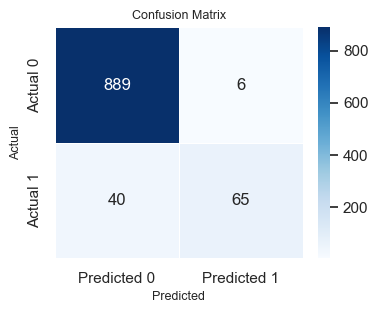

In [51]:
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. As in this case, target variable is imbalanced, accuracy score is not the proper metric. Instead, F1 score or precision/recall would be better option.
2. Recall is very bad i.e. 62% and F1 Score is around 74%.
3. Here, they want to minimize the budget and hence false positives could be costly but then if recall is higher, then that would increase the conversion rate. So, F1 score could be better metric for this. Again, we would understand this better by talking with business people.

### 3.6 Skewness treatment

In [52]:
# Combine the all the variables with imputed ones.
X2 = pd.concat([loan_data_knn_imputed, loan_data[['Family Size','CCAvgSpending','Mortgage', 'Investment Account', 'Deposit Account','InternetBanking','Personal Loan']]], axis=1)
# Check for the skewness in the numerical variables. Ideally, it should be within -0.5 to 0.5
print('Income Skew: ', X2.Income.skew())
print('CCAvgSpending Skew: ', X2.CCAvgSpending.skew())
print('Mortgage Skew: ', X2.Mortgage.skew())

Income Skew:  0.8400752497468881
CCAvgSpending Skew:  1.5984433366678663
Mortgage Skew:  2.1040023191079444


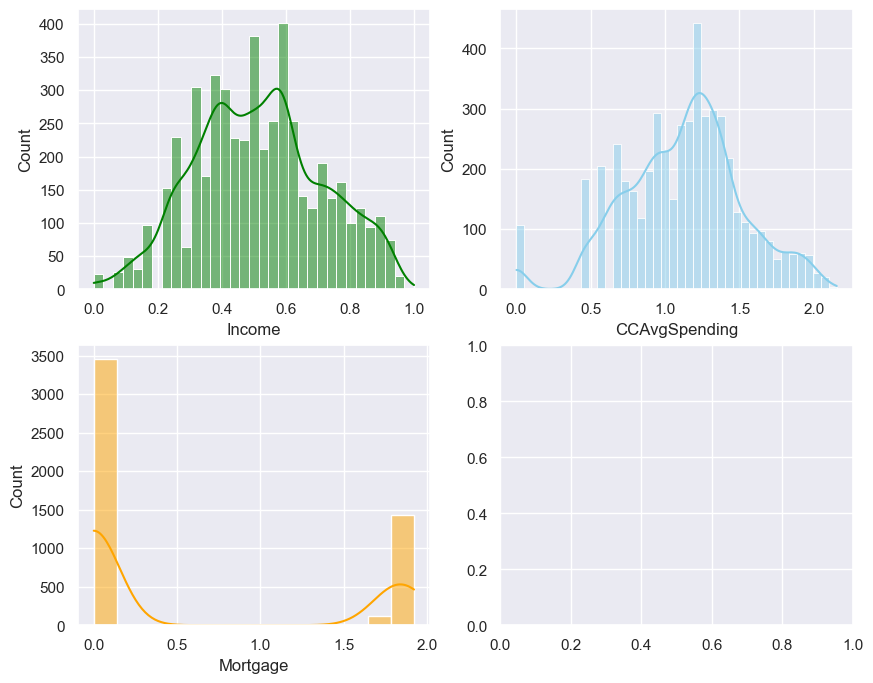

In [53]:
X2.Income = np.sqrt(X2.Income)
X2.CCAvgSpending = np.cbrt(X2.CCAvgSpending)
X2.Mortgage = pd.Series(stats.boxcox(X2.Mortgage.map(lambda i: np.abs(i) if i<0 else (i+1 if i==0 else i)))[0])

# Check for the visualization after the skewness treatment
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=X2, x="Income", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=X2, x="CCAvgSpending", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=X2, x="Mortgage", kde=True, ax=axs[1, 0], color='orange');

### Observations: 
1. Skewness seem to be definitely lesser than previous and within -0.5 to 0.5 range for Income and CCAvgSpending.
2. For mortgage, it is not ideal but less than previous.

### 3.7 Resampling

In [54]:
# Split the target variable into separate dataframe 
X = X2.drop(["Personal Loan"], axis=1)
y = X2["Personal Loan"]

# As the data is imbalanced, it would be better to make it balanced with sampling techniques. SMOTE is used here to balance it by creating synthetic entries.
X, y = SMOTE().fit_resample(X, y)

In [55]:
# Check for the number of rows. With the SMOTE technique, it created rows for the minority class.
len(y)

9040

### 3.8 Scaling

In [56]:
# Scale the data columns to be in the range of 0 and 1
X = scaler.fit_transform(X)

### 3.9 Train-Test Split

In [57]:
# Train Test split in 80-20% proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 4. Modelling

### 4.1 Logistic Regression

<Axes: xlabel='Decision Threshold', ylabel='Values'>

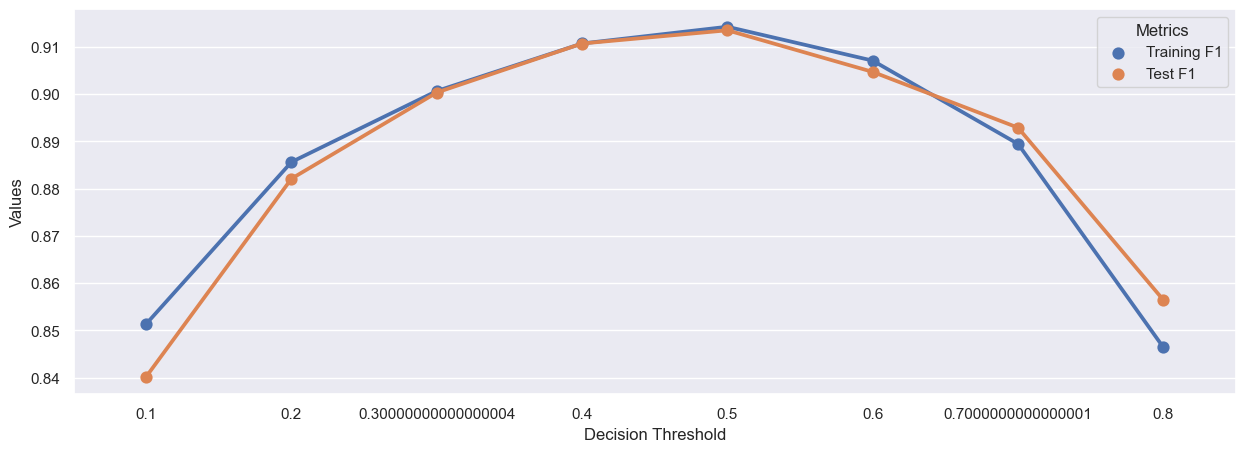

In [58]:
# Logistic Regression predicts the probability and it can be used for binary classification problems by deciding decision threshold boundary.
# Instead of 0.5, we try with different threshold and get the one with highest performance on test set.
train_f1_scores = []
test_f1_scores = []
thresholds = []

for thresh in np.arange(0.1,0.9,0.1): 
    lr_with_sampling = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)
    lr_with_sampling.fit(X_train,y_train)
    
    y_pred_train_thresh = lr_with_sampling.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)
    train_f1 = f1_score(y_train,y_pred_train)
    y_pred_test_thresh = lr_with_sampling.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    test_f1 = f1_score(y_test,y_pred_test)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [59]:
# Predict the probabilities of the model
thresh = 0.5 ### Threshold chosen from above Curves
y_pred_test_thresh = lr_with_sampling.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 

Precision: 0.898
Recall: 0.929
F1 Score: 0.913

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       933
           1       0.90      0.93      0.91       875

    accuracy                           0.91      1808
   macro avg       0.91      0.92      0.91      1808
weighted avg       0.92      0.91      0.91      1808



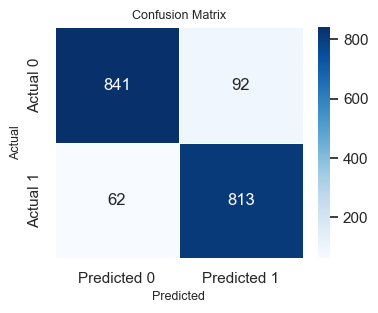

In [60]:
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. As the data is balanced, we can use Accuracy as well. Accuracy is good. F1 Score has improved as compared to baseline model. Precision is dropped a little.

### 4.2 Decision Trees

In [61]:
# Tree based algorithms are good when there are outliers in the data
# Fit decision tree for a given data
tree_clf_with_sampling = DecisionTreeClassifier()
tree_clf_with_sampling.fit(X_train,y_train)
y_pred = tree_clf_with_sampling.predict(X_train)
print("Training Data F1 Score ", f1_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(tree_clf_with_sampling,X_train,y_train,cv=5,scoring='f1_macro').mean())

Training Data F1 Score  1.0
Validation Mean F1 Score:  0.9857567718134821


#### Observations: Decision Tree has overfitted the training data. So, we need to find the optimal values of that parameters to avoid overfitting.

<Axes: xlabel='Max_Depth', ylabel='Values'>

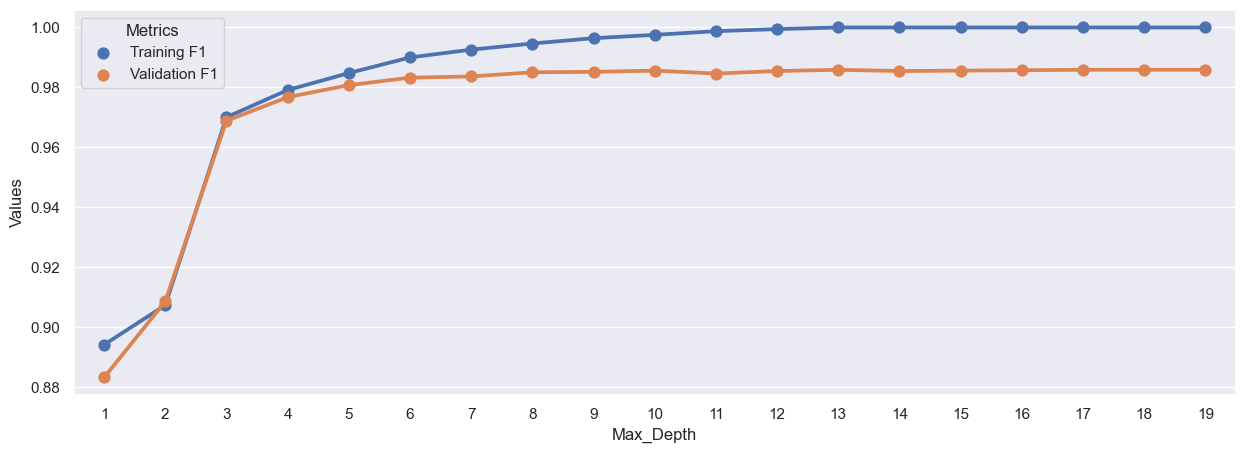

In [62]:
# Check for the different values of depth of tree to avoid decision tree to grow very long.
# We would use the one with the best performance.
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf_sampling = DecisionTreeClassifier(max_depth=depth, random_state = 42)
    tree_clf_sampling.fit(X_train,y_train)
    y_training_pred = tree_clf_sampling.predict(X_train)

    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf_sampling,X_train,y_train,cv=5,scoring='f1_macro').mean()
    
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

# Plot the depth and the model performance
plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

### Observations: 
1. max depth = 13 is the optimal one

<Axes: xlabel='Min_Samples_leaf', ylabel='Values'>

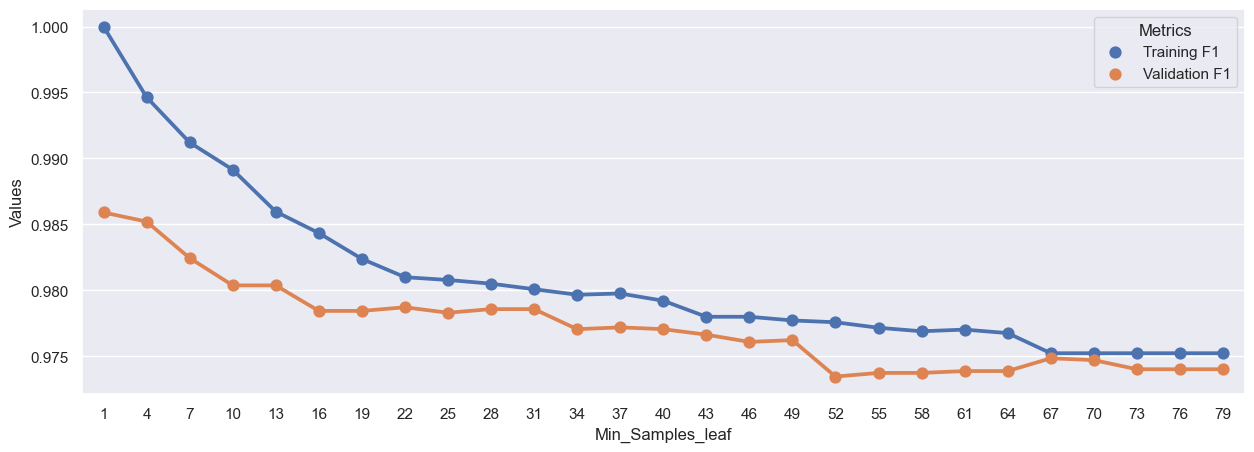

In [63]:
# Another parameter of decision tree is samples per leaf of the decision tree
# we try for different values and then pick up the one with the best performance.
training_f1 = []
val_f1 = []
min_samples_leaf = []

for samples_leaf in range(1,80,3): 
    tree_clf_sampling = DecisionTreeClassifier(max_depth=13,min_samples_leaf = samples_leaf, random_state = 42)
    tree_clf_sampling.fit(X_train,y_train)
    y_training_pred = tree_clf_sampling.predict(X_train)

    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf_sampling,X_train,y_train,cv=5,scoring='f1_macro').mean()
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

# Plot the samples per leaf and model performance.
plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

### Observations: 
1. minimum samples leaf is the one with value 1 which gives the best performance. After that, performance keeps degrading.

In [64]:
# Use the optimal values from the previous two exercises to fit the decision tree.
tree_clf_with_sampling = DecisionTreeClassifier(max_depth=13,min_samples_leaf = 1, random_state = 42)
tree_clf_with_sampling.fit(X_train,y_train)
y_pred = tree_clf_with_sampling.predict(X_test)

Precision: 0.986
Recall: 0.986
F1 Score: 0.986

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       933
           1       0.99      0.99      0.99       875

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



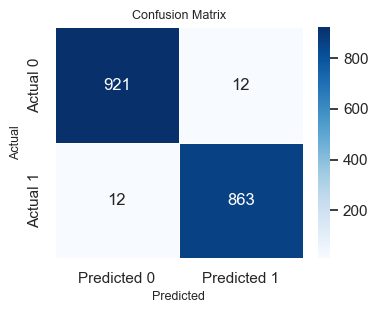

In [65]:
evaluate_model_performance(y_test, y_pred)

#### Observations: 
1. The performance has improved superbly. 
2. Precision, Recall and F1 score is over 98%. Also, false positives has reduced as well.

### 4.3 Random Forest

In [66]:
# Apply Random Forest with some parameters and fit it

rf_clf_sampling = RandomForestClassifier(n_estimators=500 ,max_depth=13, max_leaf_nodes = 10, random_state = 42)
rf_clf_sampling.fit(X_train,y_train)
y_pred = rf_clf_sampling.predict(X_train)

print("Train F1 Score ", f1_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(rf_clf_sampling,X_train,y_train,cv=5,scoring='f1_macro').mean())

Train F1 Score  0.9794520547945207
Validation Mean F1 Score:  0.9778741637851207


#### Observations: 
1. Performance of model is similar to training as well as validation. So, it is not overfitting. That's good. But it is less than Decision Tree.

Precision: 0.971
Recall: 0.983
F1 Score: 0.977

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       933
           1       0.97      0.98      0.98       875

    accuracy                           0.98      1808
   macro avg       0.98      0.98      0.98      1808
weighted avg       0.98      0.98      0.98      1808



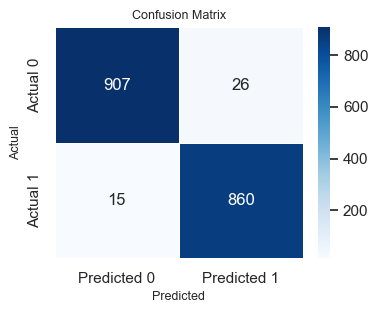

In [67]:
# Predict Random Forest on test data
y_pred = rf_clf_sampling.predict(X_test)
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. Performance seem to be similar to Training and Validation sets.

In [89]:
# Another way to increase the performance of Random Forest by using different range of parameters 
# We use Randomized Search Cross Validation to go through the parameters and fit the model.

paramsrf={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

rf_with_sampling = RandomizedSearchCV(RandomForestClassifier(random_state=42), paramsrf, cv=20, random_state=42)
rf_with_sampling.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42)

In [68]:
# Fit the Random Forest with the best parameters from previous process
rf_with_sampling = RandomForestClassifier(n_estimators=rf_with_sampling.best_params_['n_estimators'], max_depth=rf_with_sampling.best_params_['max_depth'], max_leaf_nodes=rf_with_sampling.best_params_['max_leaf_nodes'], random_state=42)
#rf_with_sampling = RandomForestClassifier(n_estimators=200, max_depth=5, max_leaf_nodes=20, random_state=42)
rf_with_sampling.fit(X_train, y_train)
y_pred = rf_with_sampling.predict(X_test)

Precision: 0.974
Recall: 0.985
F1 Score: 0.980

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       933
           1       0.97      0.99      0.98       875

    accuracy                           0.98      1808
   macro avg       0.98      0.98      0.98      1808
weighted avg       0.98      0.98      0.98      1808



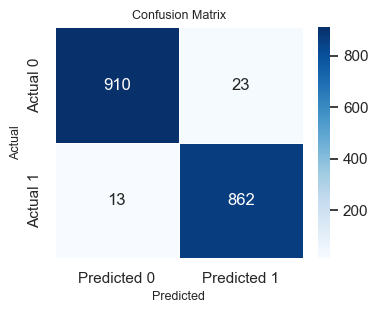

In [69]:
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. With the paremeter tuning, it has improved a little but can not surpass Decision Tree's performance.

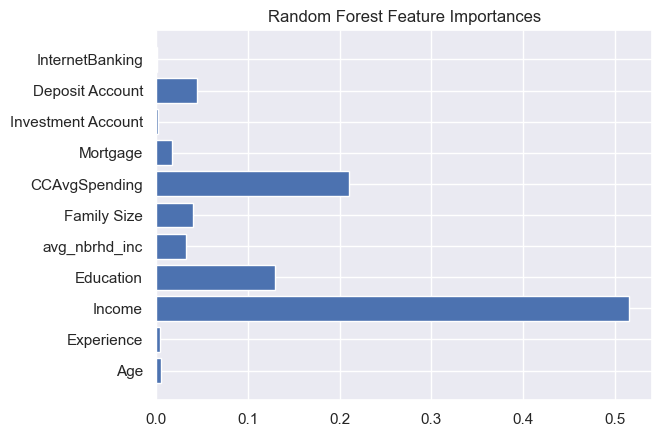

In [70]:
# Plot Random Forest feature importances from the given data
plt.barh(X2.drop(["Personal Loan"], axis=1).columns, rf_with_sampling.feature_importances_)
plt.title("Random Forest Feature Importances")
plt.show()

### Observations: 
1. Income, CCAvgSpending, Education seem to be most important variables.
2. Additionally, Family Size, Deposit Account, avg_nbrhd_inc, Mortgage are also important as well.

### 4.4 Gradient Boosting

In [95]:
# Define the range of parameters for Gradient Boosting
paramsGB={'n_estimators':[100,200,300,400,500],'max_depth':[1,2,3,4,5],'subsample':[0.5,1],'max_leaf_nodes':[2,5,10,20,30,40,50]}

# Use Randomized Search Cross Validation with Gradient Boosting model for tuning the model
GB_with_sampling = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB_with_sampling.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [71]:
# Fit the model with the best parameters and evaluate the performance
GBclassifier_with_sampling = GradientBoostingClassifier(subsample=GB_with_sampling.best_params_['subsample'], n_estimators=GB_with_sampling.best_params_['n_estimators'], max_depth=GB_with_sampling.best_params_['max_depth'], max_leaf_nodes=GB_with_sampling.best_params_['max_leaf_nodes'])
#GBclassifier_with_sampling = GradientBoostingClassifier(subsample=0.5, n_estimators=500, max_depth=4, max_leaf_nodes=10)
GBclassifier_with_sampling.fit(X_train, y_train)

y_pred = GBclassifier_with_sampling.predict(X_test)

Precision: 0.990
Recall: 0.989
F1 Score: 0.989

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       933
           1       0.99      0.99      0.99       875

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



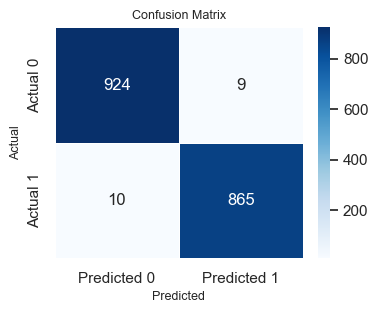

In [72]:
evaluate_model_performance(y_test, y_pred)

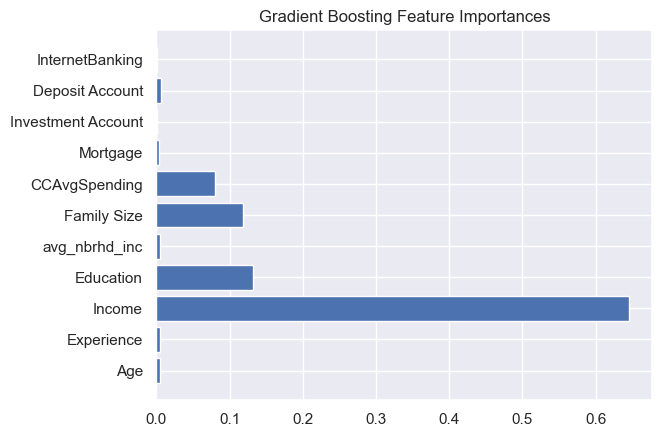

In [73]:
# Plot gradient boosting feature importances
plt.barh(X2.drop(["Personal Loan"], axis=1).columns, GBclassifier_with_sampling.feature_importances_)
plt.title("Gradient Boosting Feature Importances")
plt.show()

### Observations: 
1. Income, Education Family Size and CCAvgSpending seem to be very important for GB model

### 4.5 Models by getting only important variables

In [74]:
# Apply the Random Forest model, fit and evaluate
X = X2.drop(["Personal Loan","InternetBanking","Deposit Account","Investment Account","Mortgage", "avg_nbrhd_inc", "Age"], axis=1)
y = X2["Personal Loan"]
X, y = SMOTE().fit_resample(X, y)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 4.6 Logistic Regression Model with Imp Variables

In [77]:
lr_with_sampling_imp = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)
lr_with_sampling_imp.fit(X_train,y_train)
thresh = 0.5 ### Threshold chosen from above Curves
y_pred_test_thresh = lr_with_sampling_imp.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int)

Precision: 0.873
Recall: 0.926
F1 Score: 0.899

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       933
           1       0.87      0.93      0.90       875

    accuracy                           0.90      1808
   macro avg       0.90      0.90      0.90      1808
weighted avg       0.90      0.90      0.90      1808



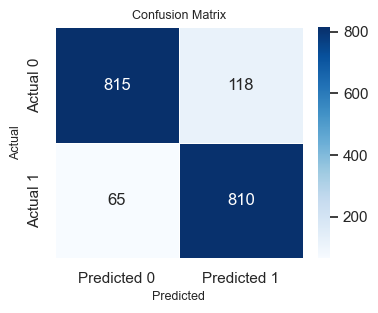

In [78]:
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. Performance of Logistic Regression has in fact dropped than the one with all the variables.

### 4.7 Decision Tree Model with Imp Variables

In [79]:
# Apply the Decision Tree model, fit and evaluate
tree_clf_with_sampling_imp = DecisionTreeClassifier(max_depth=13,min_samples_leaf = 1, random_state = 42)
tree_clf_with_sampling_imp.fit(X_train,y_train)
y_pred = tree_clf_with_sampling_imp.predict(X_test)

Precision: 0.989
Recall: 0.990
F1 Score: 0.989

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       933
           1       0.99      0.99      0.99       875

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



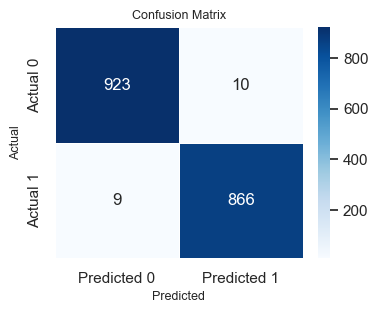

In [80]:
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. Slight improvement when only these variables are used instead of all.

### 4.8 Random Forest Model with Imp Variables

In [81]:
rf_with_sampling_imp = RandomForestClassifier(n_estimators=200, max_depth=5, max_leaf_nodes=20, random_state=42)
rf_with_sampling_imp.fit(X_train, y_train)

y_pred = rf_with_sampling_imp.predict(X_test)

Precision: 0.983
Recall: 0.979
F1 Score: 0.981

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       933
           1       0.98      0.98      0.98       875

    accuracy                           0.98      1808
   macro avg       0.98      0.98      0.98      1808
weighted avg       0.98      0.98      0.98      1808



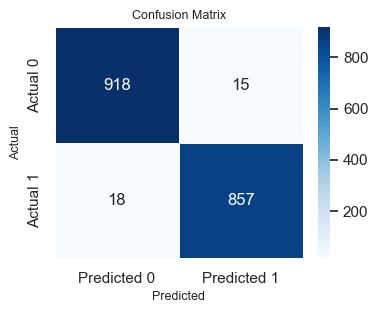

In [82]:
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. Performance of RF has improved when only important variables are kept in the model.

### 4.9 Gradient Boosting Model with Imp Variables

In [83]:
# Apply the Gradient Boosting model, fit and evaluate the model
GBclassifier_with_sampling_imp = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=40, random_state= 42)
GBclassifier_with_sampling_imp.fit(X_train, y_train)

y_pred = GBclassifier_with_sampling_imp.predict(X_test)

Precision: 0.992
Recall: 0.993
F1 Score: 0.993

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       933
           1       0.99      0.99      0.99       875

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



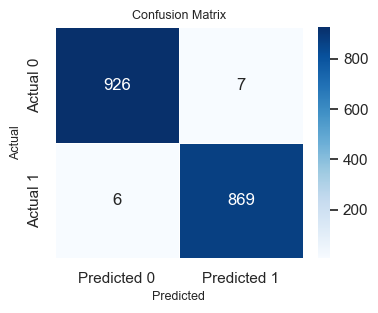

In [84]:
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. Performance is same as the one with all the variables.

### 4.10 Support Vector Machine Model with Imp Variables

In [86]:
# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

Precision: 0.873
Recall: 0.913
F1 Score: 0.893

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       933
           1       0.87      0.91      0.89       875

    accuracy                           0.89      1808
   macro avg       0.89      0.89      0.89      1808
weighted avg       0.89      0.89      0.89      1808



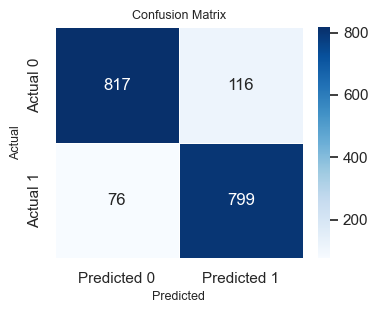

In [87]:
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. Performance of SVM is comparable with that of Logistic Regression.

### 4.11 Naive Bayes Model with Imp Variables

In [88]:
# Create a Naive Bayes classifier (e.g., Multinomial Naive Bayes for text data)
nb_classifier = MultinomialNB()

# Train the Naive Bayes classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

Precision: 0.596
Recall: 0.728
F1 Score: 0.655

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.54      0.60       933
           1       0.60      0.73      0.66       875

    accuracy                           0.63      1808
   macro avg       0.64      0.63      0.63      1808
weighted avg       0.64      0.63      0.63      1808



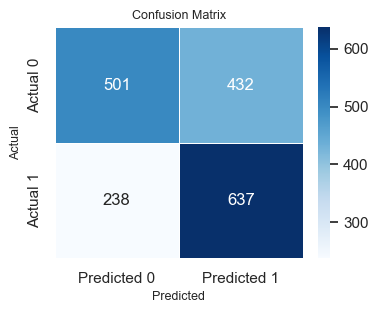

In [89]:
evaluate_model_performance(y_test, y_pred)

### Observations: 
1. Performance is very poor. It is even worse than the baseline model.

### 4.12 Voting Model with best 3 models earlier

In [96]:
# Create a voting classifier with your models
voting_classifier = VotingClassifier(
    estimators=[
        ('DTmodel', tree_clf_with_sampling_imp),
        ('RFmodel', rf_with_sampling_imp),
        ('GBmodel', GBclassifier_with_sampling_imp)
    ],
    voting='hard'
)

In [97]:
# Train the voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
voting_predictions = voting_classifier.predict(X_test)

Precision: 0.989
Recall: 0.993
F1 Score: 0.991

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       933
           1       0.99      0.99      0.99       875

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



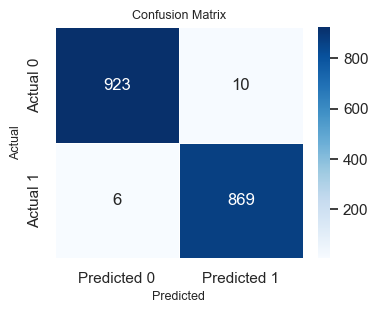

In [98]:
evaluate_model_performance(y_test, voting_predictions)

### Observations: 
1. Performance of voting classifier is better than all models except Gradient Boosting model.

### 5. Final Thoughts & Summary: 
1. Gradient Boosting seem to perform better when used with the sampling techniques.
2. Based on the imbalance or balance in the dataset, appropriate performance metric needs to be used. F1 Score, Precision, Recall are most appropriate.
3. Gradient Boosting model performs better than voting classifier built with the best 3 models in terms of F1 score.
4. Income, CCAvgSpending, Education and Family Size seem to be important variables in the dataset to identify whether person would accept the personal loan offer or not.
5. Parameter Tuning should be done for the algorithm to avoid the overfitting the model as done here.